In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce #Base N Encoding and Hash Encoding
import matplotlib.pyplot as plt

# Data Info

In [3]:
df = pd.read_csv(r"C:\Users\sneha\Desktop\All\PESU\Capstone Project\Datasets\Synth_data.csv")

In [4]:
df.head()

,Timestamp,Version,_id,_index,_score,_type,beat.hostname,beat.name,beat.version,clientIp,...,offset,project,responseCode,responseTime,source,tags,timestamp,type,uri,Bandwidth_in_Mbps
0,28-01-1970,21,ccbe5537365a,pingf-sys-log-01-08-2003,9381,pingf-sys-log2783,April York9457,April York9457,7972.8976.1261,192.168.0.139,...,186.8597,pingf,"('300',)",09:51:11,/economy/federal.numbers1973-05-29response2952...,"pingf, qa, ping-federate, gcc, beats input cod...",21:26:46,pingf-sys-log2783,https://example.com/unit/police.mp4,519
1,24-06-1978,22,2d8e9958f7ed,pingf-sys-log-10-08-2018,9896,pingf-sys-log8663,Elizabeth Harris3569,Elizabeth Harris3569,9369.7390.4458,192.168.0.138,...,5953.4990,pingf,"('500',)",16:48:07,/least/rest.bmp1979-07-15response4956.log,"pingf, qa, ping-federate, gcc, beats input cod...",19:03:54,pingf-sys-log8663,https://example.com/Mrs/else.webm,829
2,28-05-2014,23,c283e0c0fcc2,pingf-sys-log-10-07-2009,2428,pingf-sys-log1132,Linda King7727,Linda King7727,4606.2286.2349,192.168.0.138,...,1196.9563,pingf,"('200',)",05:16:23,/artist/customer.flac1999-02-28response3129.log,"pingf, qa, ping-federate, gcc, beats input cod...",02:54:49,pingf-sys-log1132,https://example.com/approach/do.pages,769
3,30-04-1971,24,fbce06eaee7c,pingf-sys-log-20-06-1993,2857,pingf-sys-log6061,Brian Jones8614,Brian Jones8614,1626.4908.1802,192.168.0.167,...,9006.1887,pingf,"('500',)",08:37:32,/available/teach.doc2003-04-10request4673.log,"pingf, qa, ping-federate, gcc, beats input cod...",00:23:40,pingf-sys-log6061,https://example.com/yeah/hour.png,733
4,27-02-2006,25,46b8193fdeb9,pingf-sys-log-18-12-1971,7804,pingf-sys-log6181,Craig Patel1865,Craig Patel1865,4189.5035.6999,192.168.0.26,...,7896.9035,pingf,"('500',)",07:41:37,/politics/company.png1998-03-30response7314.log,"pingf, qa, ping-federate, gcc, beats input cod...",22:09:20,pingf-sys-log6181,https://example.com/case/difficult.pdf,901


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908659 entries, 0 to 908658
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Timestamp          908659 non-null  object 
 1   Version            908659 non-null  int64  
 2   _id                908659 non-null  object 
 3   _index             908659 non-null  object 
 4   _score             908659 non-null  int64  
 5   _type              908659 non-null  object 
 6   beat.hostname      908659 non-null  object 
 7   beat.name          908659 non-null  object 
 8   beat.version       908659 non-null  object 
 9   clientIp           908659 non-null  object 
 10  env                908659 non-null  object 
 11  host               908659 non-null  object 
 12  hostname           908659 non-null  object 
 13  httpVersion        908659 non-null  float64
 14  log-type           908659 non-null  object 
 15  message            908659 non-null  object 
 16  me

In [6]:
df.shape

(908659, 27)

In [7]:
df.describe()

,Version,_score,httpVersion,offset,Bandwidth_in_Mbps
count,908659.000000,908659.000000,9.086590e+05,908659.000000,908659.000000
mean,454350.000000,5000.112381,1.100000e+00,5000.415215,500.099086
std,262307.403462,2887.426242,1.609913e-11,2887.465419,289.021949
min,21.000000,0.000000,1.100000e+00,0.103600,1.000000
25%,227185.500000,2500.000000,1.100000e+00,2498.277550,249.000000
50%,454350.000000,5002.000000,1.100000e+00,4997.528200,501.000000
75%,681514.500000,7504.000000,1.100000e+00,7505.380450,751.000000
max,908679.000000,9999.000000,1.100000e+00,9999.945600,999.000000


In [8]:
#null values
df_null_values = df.isnull().sum()
print(df_null_values.to_string())

Timestamp            0
Version              0
_id                  0
_index               0
_score               0
_type                0
beat.hostname        0
beat.name            0
beat.version         0
clientIp             0
env                  0
host                 0
hostname             0
httpVersion          0
log-type             0
message              0
method               0
offset               0
project              0
responseCode         0
responseTime         0
source               0
tags                 0
timestamp            0
type                 0
uri                  0
Bandwidth_in_Mbps    0


In [9]:
#inf values
ds = df.isin([np.inf, -np.inf])
print("Infinite values:" ,ds)

Infinite values:         Timestamp  Version    _id  _index  _score  _type  beat.hostname  \
0           False    False  False   False   False  False          False   
1           False    False  False   False   False  False          False   
2           False    False  False   False   False  False          False   
3           False    False  False   False   False  False          False   
4           False    False  False   False   False  False          False   
...           ...      ...    ...     ...     ...    ...            ...   
908654      False    False  False   False   False  False          False   
908655      False    False  False   False   False  False          False   
908656      False    False  False   False   False  False          False   
908657      False    False  False   False   False  False          False   
908658      False    False  False   False   False  False          False   

        beat.name  beat.version  clientIp  ...  offset  project  responseCode  \
0

In [10]:
include_columns = ['Version','httpVersion','offset','Bandwidth_in_Mbps']
for column in df.columns:
    if column in include_columns:
        num_negatives = (df[column] < 0).sum()
        print(f"Total negative values in '{column}': {num_negatives}")

Total negative values in 'Version': 0
Total negative values in 'httpVersion': 0
Total negative values in 'offset': 0
Total negative values in 'Bandwidth_in_Mbps': 0


# Columns needed
* _id
* _score
* clientIp
* log-type
* method
* responseCode
* responseTime
* Bandwidth_in_Mbps

In [11]:
#dropping the rest of the columns
columns_to_keep = ['_id', '_score', 'clientIp', 'log-type', 'method', 'responseCode', 'responseTime', 'Bandwidth_in_Mbps']
df = df[columns_to_keep]
print(df)

                 _id  _score       clientIp       log-type   method  \
0       ccbe5537365a    9381  192.168.0.139   ('request',)      GET   
1       2d8e9958f7ed    9896  192.168.0.138  ('response',)     POST   
2       c283e0c0fcc2    2428  192.168.0.138   ('request',)      GET   
3       fbce06eaee7c    2857  192.168.0.167  ('response',)     POST   
4       46b8193fdeb9    7804   192.168.0.26  ('response',)     POST   
...              ...     ...            ...            ...      ...   
908654  3cb003dafc93    4709  192.168.0.254   ('request',)      GET   
908655  c69866828018     890   192.168.0.25   ('request',)   DELETE   
908656  9e10f837b2eb    1135   192.168.0.34  ('response',)     POST   
908657  9a385df2c69e    8630  192.168.0.167   ('request',)  OPTIONS   
908658  f5a3966681bb    5876   192.168.0.98   ('request',)     POST   

       responseCode responseTime  Bandwidth_in_Mbps  
0          ('300',)     09:51:11                519  
1          ('500',)     16:48:07       

In [12]:
df['_score'] = df['_score'] / 100

In [13]:
df.head()

,_id,_score,clientIp,log-type,method,responseCode,responseTime,Bandwidth_in_Mbps
0,ccbe5537365a,93.81,192.168.0.139,"('request',)",GET,"('300',)",09:51:11,519
1,2d8e9958f7ed,98.96,192.168.0.138,"('response',)",POST,"('500',)",16:48:07,829
2,c283e0c0fcc2,24.28,192.168.0.138,"('request',)",GET,"('200',)",05:16:23,769
3,fbce06eaee7c,28.57,192.168.0.167,"('response',)",POST,"('500',)",08:37:32,733
4,46b8193fdeb9,78.04,192.168.0.26,"('response',)",POST,"('500',)",07:41:37,901


In [14]:
df_new = df.copy()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908659 entries, 0 to 908658
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   _id                908659 non-null  object 
 1   _score             908659 non-null  float64
 2   clientIp           908659 non-null  object 
 3   log-type           908659 non-null  object 
 4   method             908659 non-null  object 
 5   responseCode       908659 non-null  object 
 6   responseTime       908659 non-null  object 
 7   Bandwidth_in_Mbps  908659 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 55.5+ MB


In [16]:
df.describe()

,_score,Bandwidth_in_Mbps
count,908659.000000,908659.000000
mean,50.001124,500.099086
std,28.874262,289.021949
min,0.000000,1.000000
25%,25.000000,249.000000
50%,50.020000,501.000000
75%,75.040000,751.000000
max,99.990000,999.000000


In [17]:
count = df['_id'].nunique()
print('_id ',count)
count = df['clientIp'].nunique()
print('clientIp ',count)
count = df['log-type'].nunique()
print('log-type ',count)
count = df['method'].nunique()
print('method ',count)
count = df['responseCode'].nunique()
print('responseCode ',count)

_id  908659
clientIp  256
log-type  2
method  5
responseCode  4


i dont think we need to do encoding for id/ use id for clustering as everything is a unique value

[Types of Encoding](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)

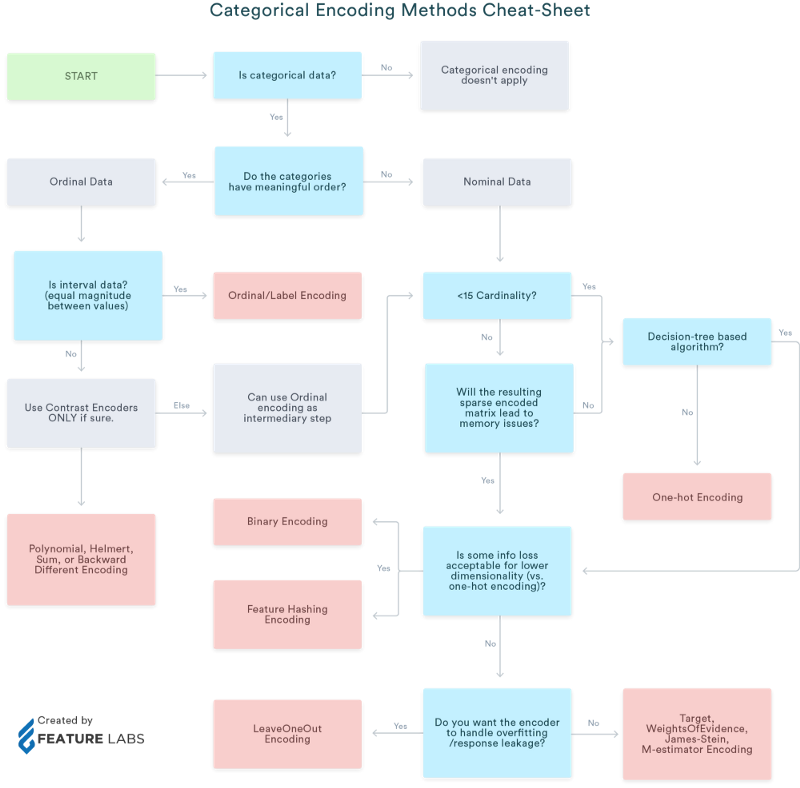

# One Hot Encoding

In [18]:
data_OH = df.copy()

In [19]:
categorical_columns = ['method','log-type','responseCode']
for col in categorical_columns:
    col_ohe = pd.get_dummies(data_OH[col], prefix=col)
    data_OH = pd.concat((data_OH, col_ohe), axis=1).drop(col, axis=1)

In [20]:
data_OH.head()

,_id,_score,clientIp,responseTime,Bandwidth_in_Mbps,method_DELETE,method_GET,method_OPTIONS,method_POST,method_PUT,"log-type_('request',)","log-type_('response',)","responseCode_('200',)","responseCode_('300',)","responseCode_('400',)","responseCode_('500',)"
0,ccbe5537365a,93.81,192.168.0.139,09:51:11,519,0,1,0,0,0,1,0,0,1,0,0
1,2d8e9958f7ed,98.96,192.168.0.138,16:48:07,829,0,0,0,1,0,0,1,0,0,0,1
2,c283e0c0fcc2,24.28,192.168.0.138,05:16:23,769,0,1,0,0,0,1,0,1,0,0,0
3,fbce06eaee7c,28.57,192.168.0.167,08:37:32,733,0,0,0,1,0,0,1,0,0,0,1
4,46b8193fdeb9,78.04,192.168.0.26,07:41:37,901,0,0,0,1,0,0,1,0,0,0,1


# Base N Encoding

In [21]:
ce_baseN4 = ce.BaseNEncoder(cols=['clientIp'], base=7)
encoded_data = ce_baseN4.fit_transform(data_OH)
data_OH_encoded = pd.concat([data_OH, encoded_data], axis=1)  # Concatenate the encoded columns with the original DataFrame
data_OH_encoded.head()

,_id,_score,clientIp,responseTime,Bandwidth_in_Mbps,method_DELETE,method_GET,method_OPTIONS,method_POST,method_PUT,...,method_GET,method_OPTIONS,method_POST,method_PUT,"log-type_('request',)","log-type_('response',)","responseCode_('200',)","responseCode_('300',)","responseCode_('400',)","responseCode_('500',)"
0,ccbe5537365a,93.81,192.168.0.139,09:51:11,519,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,2d8e9958f7ed,98.96,192.168.0.138,16:48:07,829,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,c283e0c0fcc2,24.28,192.168.0.138,05:16:23,769,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
3,fbce06eaee7c,28.57,192.168.0.167,08:37:32,733,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
4,46b8193fdeb9,78.04,192.168.0.26,07:41:37,901,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [22]:
data_OH_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908659 entries, 0 to 908658
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   _id                     908659 non-null  object 
 1   _score                  908659 non-null  float64
 2   clientIp                908659 non-null  object 
 3   responseTime            908659 non-null  object 
 4   Bandwidth_in_Mbps       908659 non-null  int64  
 5   method_DELETE           908659 non-null  uint8  
 6   method_GET              908659 non-null  uint8  
 7   method_OPTIONS          908659 non-null  uint8  
 8   method_POST             908659 non-null  uint8  
 9   method_PUT              908659 non-null  uint8  
 10  log-type_('request',)   908659 non-null  uint8  
 11  log-type_('response',)  908659 non-null  uint8  
 12  responseCode_('200',)   908659 non-null  uint8  
 13  responseCode_('300',)   908659 non-null  uint8  
 14  responseCode_('400',

In [23]:
data_OH_encoded = data_OH_encoded.loc[:, ~data_OH_encoded.columns.duplicated()]

In [24]:
data_OH_encoded.head()

,_id,_score,clientIp,responseTime,Bandwidth_in_Mbps,method_DELETE,method_GET,method_OPTIONS,method_POST,method_PUT,"log-type_('request',)","log-type_('response',)","responseCode_('200',)","responseCode_('300',)","responseCode_('400',)","responseCode_('500',)",clientIp_0,clientIp_1,clientIp_2
0,ccbe5537365a,93.81,192.168.0.139,09:51:11,519,0,1,0,0,0,1,0,0,1,0,0,0,0,1
1,2d8e9958f7ed,98.96,192.168.0.138,16:48:07,829,0,0,0,1,0,0,1,0,0,0,1,0,0,2
2,c283e0c0fcc2,24.28,192.168.0.138,05:16:23,769,0,1,0,0,0,1,0,1,0,0,0,0,0,2
3,fbce06eaee7c,28.57,192.168.0.167,08:37:32,733,0,0,0,1,0,0,1,0,0,0,1,0,0,3
4,46b8193fdeb9,78.04,192.168.0.26,07:41:37,901,0,0,0,1,0,0,1,0,0,0,1,0,0,4


In [25]:
data_encoded = data_OH_encoded.copy()

# K means clustering

In [26]:
data_K = data_encoded.copy()

In [27]:
data_K.head()

,_id,_score,clientIp,responseTime,Bandwidth_in_Mbps,method_DELETE,method_GET,method_OPTIONS,method_POST,method_PUT,"log-type_('request',)","log-type_('response',)","responseCode_('200',)","responseCode_('300',)","responseCode_('400',)","responseCode_('500',)",clientIp_0,clientIp_1,clientIp_2
0,ccbe5537365a,93.81,192.168.0.139,09:51:11,519,0,1,0,0,0,1,0,0,1,0,0,0,0,1
1,2d8e9958f7ed,98.96,192.168.0.138,16:48:07,829,0,0,0,1,0,0,1,0,0,0,1,0,0,2
2,c283e0c0fcc2,24.28,192.168.0.138,05:16:23,769,0,1,0,0,0,1,0,1,0,0,0,0,0,2
3,fbce06eaee7c,28.57,192.168.0.167,08:37:32,733,0,0,0,1,0,0,1,0,0,0,1,0,0,3
4,46b8193fdeb9,78.04,192.168.0.26,07:41:37,901,0,0,0,1,0,0,1,0,0,0,1,0,0,4


In [28]:
data_K = data_K.drop(['_id'],axis = 1)
data_K = data_K.drop(['responseTime'],axis = 1)
data_K = data_K.drop(['clientIp'],axis = 1)

In [29]:
data_K.head()

,_score,Bandwidth_in_Mbps,method_DELETE,method_GET,method_OPTIONS,method_POST,method_PUT,"log-type_('request',)","log-type_('response',)","responseCode_('200',)","responseCode_('300',)","responseCode_('400',)","responseCode_('500',)",clientIp_0,clientIp_1,clientIp_2
0,93.81,519,0,1,0,0,0,1,0,0,1,0,0,0,0,1
1,98.96,829,0,0,0,1,0,0,1,0,0,0,1,0,0,2
2,24.28,769,0,1,0,0,0,1,0,1,0,0,0,0,0,2
3,28.57,733,0,0,0,1,0,0,1,0,0,0,1,0,0,3
4,78.04,901,0,0,0,1,0,0,1,0,0,0,1,0,0,4


In [30]:
#1
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

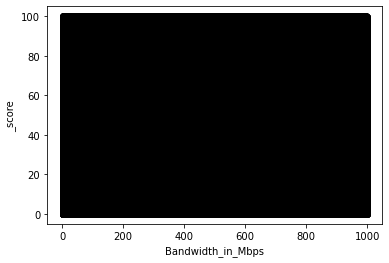

In [31]:
X = data_K[["_score","Bandwidth_in_Mbps"]]
plt.scatter(X["Bandwidth_in_Mbps"],X["_score"],c='black') #Visualise data points
plt.xlabel('Bandwidth_in_Mbps')
plt.ylabel('_score')
plt.show()

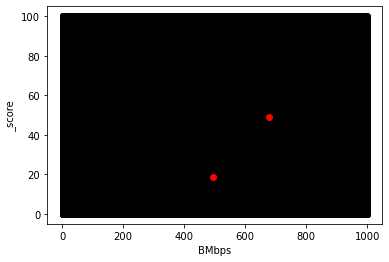

In [32]:
K=2
Centroids = (X.sample(n=K)) # Select random observation as centroids
plt.scatter(X["Bandwidth_in_Mbps"],X["_score"],c='black')
plt.scatter(Centroids["Bandwidth_in_Mbps"],Centroids["_score"],c='red')
plt.xlabel('BMbps')
plt.ylabel('_score')
plt.show()

In [33]:
#2
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=908659, centers=2, n_features=16)

data_K = pd.DataFrame(X, columns=['_score', 'Bandwidth_in_Mbps', 'method_DELETE', 'method_GET', 'method_OPTIONS', 'method_POST', 'method_PUT', 'log-type_(\'request\',)', 'log-type_(\'response\',)', 'responseCode_(\'200\',)', 'responseCode_(\'300\',)', 'responseCode_(\'400\',)', 'responseCode_(\'500\',)', 'clientIp_0', 'clientIp_1', 'clientIp_2']
)

kmeans = KMeans(n_clusters=2)

y = kmeans.fit_predict(data_K[['_score', 'Bandwidth_in_Mbps', 'method_DELETE', 'method_GET', 'method_OPTIONS', 'method_POST', 'method_PUT', 'log-type_(\'request\',)', 'log-type_(\'response\',)', 'responseCode_(\'200\',)', 'responseCode_(\'300\',)', 'responseCode_(\'400\',)', 'responseCode_(\'500\',)', 'clientIp_0', 'clientIp_1', 'clientIp_2']
])

data_K['Cluster'] = y

print(data_K.head())

     _score  Bandwidth_in_Mbps  method_DELETE  method_GET  method_OPTIONS  \
0  8.719423           7.813649      -3.768268    8.898576      -10.362155   
1  8.163564           6.968769      -3.888607    7.957375       -8.325380   
2  7.883127           7.439474      -6.061408    8.248116       -8.964506   
3  7.616453           9.535807      -7.400554    7.071474       -7.835758   
4  7.460179           7.335572      -6.376319    8.592145       -8.572416   

   method_POST  method_PUT  log-type_('request',)  log-type_('response',)  \
0     8.659754    5.285346               0.841110               -2.754308   
1     9.020485    6.076721               1.089892               -1.595561   
2     9.459721    6.767561               0.004474               -1.932082   
3    10.145606    4.993965               0.715698               -0.290421   
4     8.610490    5.727115               2.907201               -1.763593   

   responseCode_('200',)  responseCode_('300',)  responseCode_('400',)  \


In [34]:
cluster_counts = data_K['Cluster'].value_counts()
print(cluster_counts)

0    454330
1    454329
Name: Cluster, dtype: int64


# Mini Batch K Means

In [35]:
data_MK = data_encoded.copy()

In [36]:
#1
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import MiniBatchKMeans

X, _ = make_blobs(n_samples=908659, centers=2, n_features=16)

data_MK = pd.DataFrame(X, columns=['_score', 'Bandwidth_in_Mbps', 'method_DELETE', 'method_GET', 'method_OPTIONS', 'method_POST', 'method_PUT', 'log-type_(\'request\',)', 'log-type_(\'response\',)', 'responseCode_(\'200\',)', 'responseCode_(\'300\',)', 'responseCode_(\'400\',)', 'responseCode_(\'500\',)', 'clientIp_0', 'clientIp_1', 'clientIp_2'])

kmeans = MiniBatchKMeans(n_clusters=2, batch_size=100, max_iter=1000)

y = kmeans.fit_predict(data_MK[['_score', 'Bandwidth_in_Mbps', 'method_DELETE', 'method_GET', 'method_OPTIONS', 'method_POST', 'method_PUT', 'log-type_(\'request\',)', 'log-type_(\'response\',)', 'responseCode_(\'200\',)', 'responseCode_(\'300\',)', 'responseCode_(\'400\',)', 'responseCode_(\'500\',)', 'clientIp_0', 'clientIp_1', 'clientIp_2']])

data_MK['Cluster'] = y

print(data_MK.head())

C:\Users\sneha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


      _score  Bandwidth_in_Mbps  method_DELETE  method_GET  method_OPTIONS  \
0  -6.911615          -7.488955      -4.329597    7.247656        1.539154   
1  -8.076385          -8.624821      -3.509287    5.320362        0.942827   
2   7.346880           2.040646       9.142422    7.639105        6.448008   
3 -10.099708          -8.053796      -5.120635    6.169824        3.365097   
4   6.106700           2.562434      10.188685    7.431592        5.056531   

   method_POST  method_PUT  log-type_('request',)  log-type_('response',)  \
0     2.878602   -4.896968              -0.512084               -6.918255   
1     1.503113   -3.748165              -0.001487               -6.192018   
2    10.092627    3.692962               6.369431               -2.362595   
3     3.780481   -5.034418               0.067088               -8.528492   
4    10.206739    5.904441               4.419030               -1.695380   

   responseCode_('200',)  responseCode_('300',)  responseCode_('400'

In [37]:
count = data_MK['Cluster'].value_counts()
print(count)

1    454330
0    454329
Name: Cluster, dtype: int64


# K - Medoids

In [41]:
data_KM = data_encoded.copy()

In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import timedcall

X, _ = make_blobs(n_samples=908659, centers=2, n_features=16)

data_KM = pd.DataFrame(X, columns=['_score', 'Bandwidth_in_Mbps', 'method_DELETE', 'method_GET', 'method_OPTIONS', 'method_POST', 'method_PUT', 'log-type_(\'request\',)', 'log-type_(\'response\',)', 'responseCode_(\'200\',)', 'responseCode_(\'300\',)', 'responseCode_(\'400\',)', 'responseCode_(\'500\',)', 'clientIp_0', 'clientIp_1', 'clientIp_2'])

n_clusters = 2
batch_size = 1000
max_iterations = 100

# Initialize K-Medoids with random medoids
medoid_indices = np.random.choice(len(data_KM), size=n_clusters, replace=False)
initial_medoids = data_KM.iloc[medoid_indices][['_score', 'Bandwidth_in_Mbps', 'method_DELETE', 'method_GET', 'method_OPTIONS', 'method_POST', 'method_PUT', 'log-type_(\'request\',)', 'log-type_(\'response\',)', 'responseCode_(\'200\',)', 'responseCode_(\'300\',)', 'responseCode_(\'400\',)', 'responseCode_(\'500\',)', 'clientIp_0', 'clientIp_1', 'clientIp_2']].values

# Convert DataFrame to numpy array
data_KM_values = data_KM[['_score', 'Bandwidth_in_Mbps', 'method_DELETE', 'method_GET', 'method_OPTIONS', 'method_POST', 'method_PUT', 'log-type_(\'request\',)', 'log-type_(\'response\',)', 'responseCode_(\'200\',)', 'responseCode_(\'300\',)', 'responseCode_(\'400\',)', 'responseCode_(\'500\',)', 'clientIp_0', 'clientIp_1', 'clientIp_2']].values

# Create K-Medoids instance
kmedoids_instance = kmedoids(data_KM_values, initial_medoids, ccore=False)

# Perform mini-batch K-Medoids clustering
timed_call = timedcall(kmedoids_instance.process, amount=batch_size, iterations=max_iterations)
y = kmedoids_instance.get_clusters()

# Flatten the cluster results
cluster_labels = np.zeros(len(data_KM_values), dtype=np.int32)
for cluster_idx, data_indices in enumerate(y):
    cluster_labels[data_indices] = cluster_idx

data_KM['Cluster'] = cluster_labels

print(data_KM.head())

# Agglomerative Clustering

In [52]:
data_HC = data_encoded.copy()

In [53]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(n_samples=908659, centers=2, n_features=16)

data_HC = pd.DataFrame(X, columns=['_score', 'Bandwidth_in_Mbps', 'method_DELETE', 'method_GET', 'method_OPTIONS', 'method_POST', 'method_PUT', 'log-type_(\'request\',)', 'log-type_(\'response\',)', 'responseCode_(\'200\',)', 'responseCode_(\'300\',)', 'responseCode_(\'400\',)', 'responseCode_(\'500\',)', 'clientIp_0', 'clientIp_1', 'clientIp_2'])

# Choose the number of clusters (K)
n_clusters = 2

# Choose the linkage method
linkage_method = 'single'  # You can choose 'single', 'complete', 'average', etc.

# Perform agglomerative clustering
agglomerative_model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
y = agglomerative_model.fit_predict(data_HC[['_score', 'Bandwidth_in_Mbps', 'method_DELETE', 'method_GET', 'method_OPTIONS', 'method_POST', 'method_PUT', 'log-type_(\'request\',)', 'log-type_(\'response\',)', 'responseCode_(\'200\',)', 'responseCode_(\'300\',)', 'responseCode_(\'400\',)', 'responseCode_(\'500\',)', 'clientIp_0', 'clientIp_1', 'clientIp_2']])

data_HC['Cluster'] = y

print(data_HC.head())

     _score  Bandwidth_in_Mbps  method_DELETE  method_GET  method_OPTIONS  \
0 -3.006980          -4.443145      -4.414251   -7.588095        0.058574   
1 -2.038648          -3.756785      -5.799141   -8.691168        0.532238   
2 -3.373432          -5.917250      -5.249429   -8.965262       -0.042775   
3  3.781002          -9.264143      -6.788564   -9.693074        0.298097   
4  3.591428          -7.047984      -6.443866   -9.699361        0.348448   

   method_POST  method_PUT  log-type_('request',)  log-type_('response',)  \
0     4.006777   -4.377469              -2.967038               -8.551019   
1     4.754254   -2.935868              -5.557445               -8.086489   
2     6.396813   -4.180097              -3.303198               -6.419952   
3     9.189009   -1.025430               8.424885               -6.463735   
4    10.428640    1.633577               8.727580               -5.117742   

   responseCode_('200',)  responseCode_('300',)  responseCode_('400',)  \


In [54]:
count = data_HC['Cluster'].value_counts()
print(count)

0    454330
1    454329
Name: Cluster, dtype: int64


# DBSCAN

In [55]:
data_DB = data_encoded.copy()

In [56]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X, _ = make_blobs(n_samples=908659, centers=2, n_features=16)

data_DB = pd.DataFrame(X, columns=['_score', 'Bandwidth_in_Mbps', 'method_DELETE', 'method_GET', 'method_OPTIONS', 'method_POST', 'method_PUT', 'log-type_(\'request\',)', 'log-type_(\'response\',)', 'responseCode_(\'200\',)', 'responseCode_(\'300\',)', 'responseCode_(\'400\',)', 'responseCode_(\'500\',)', 'clientIp_0', 'clientIp_1', 'clientIp_2'])

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_DB)

# Perform DBSCAN clustering
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
y = dbscan_model.fit_predict(X_scaled)

data_DB['Cluster'] = y

print(data_DB.head())

     _score  Bandwidth_in_Mbps  method_DELETE  method_GET  method_OPTIONS  \
0 -5.269319          -8.029609       9.055623    1.450269       -7.327117   
1  5.271440           0.477815      -7.770777   -0.642066        0.315861   
2  4.231292           0.275315      -6.248905   -0.283498        1.857697   
3  4.587272           0.853339      -5.176822   -0.979922        1.335037   
4  5.693431           0.543959      -4.748261   -2.271403        2.912073   

   method_POST  method_PUT  log-type_('request',)  log-type_('response',)  \
0    -6.154250   -8.812424               5.997558              -10.979342   
1    -7.348396   -9.464851               0.410107               -1.861428   
2    -7.486850   -8.901574               0.375095               -3.168142   
3    -8.170847  -10.813793               1.553335               -1.850700   
4    -8.795496   -9.233376               1.650946               -1.091099   

   responseCode_('200',)  responseCode_('300',)  responseCode_('400',)  \


In [58]:
count = data_DB['Cluster'].value_counts()
print(count.to_string())

-1      908012
 57         15
 26         15
 32         12
 33         11
 23         11
 6          11
 63         10
 38         10
 30          9
 72          9
 29          8
 36          8
 14          8
 53          8
 8           8
 15          8
 37          8
 28          7
 18          7
 5           7
 88          7
 2           7
 98          7
 79          7
 105         6
 71          6
 4           6
 64          6
 9           6
 75          6
 80          6
 91          6
 107         6
 1           6
 74          6
 96          6
 100         5
 70          5
 50          5
 56          5
 0           5
 102         5
 31          5
 89          5
 66          5
 95          5
 24          5
 48          5
 94          5
 46          5
 41          5
 27          5
 104         5
 43          5
 58          5
 51          5
 67          5
 61          5
 55          5
 101         5
 42          5
 81          5
 35          5
 85          5
 69          5
 44       